In [1]:
# Exercise 1 (p.368, Chap.9), 2 (p.368, Chap.9), 4 (p.369, Chap.9), 7 (p.371, Chap.9) and 8 (p.371)

# Excercise 1 chapter 9

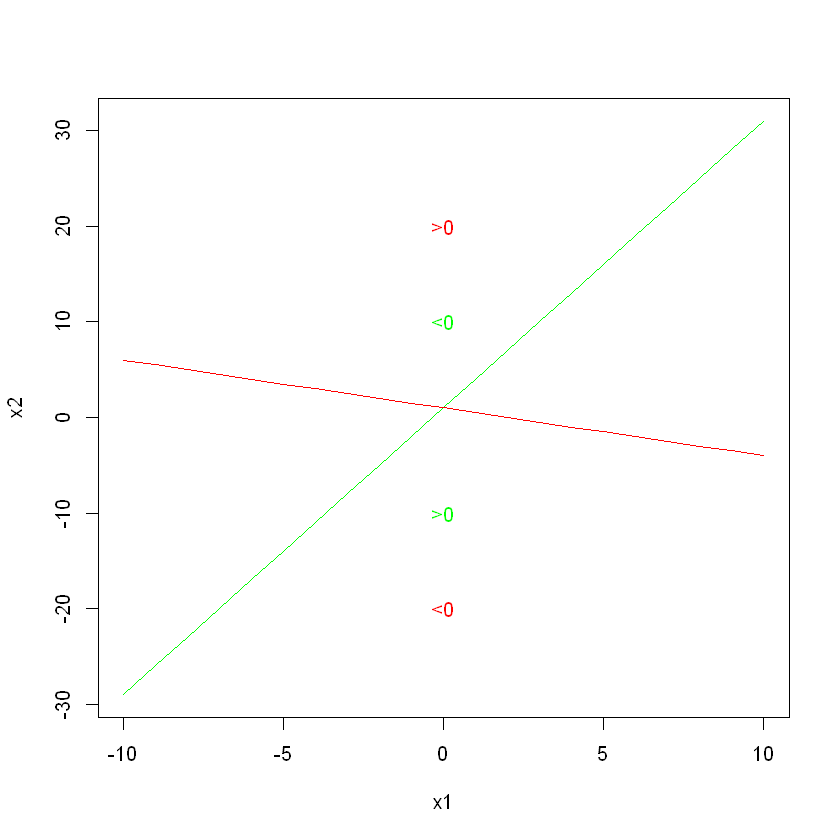

In [9]:
#(part a and b)
x1 <- -10:10
x2 <- 1 + 3 * x1
plot(x1, x2, type = "l", col = "green")
text(c(0), c(-10), ">0", col = "green")
text(c(0), c(10), "<0", col = "green")


lines(x1, 1 - x1/2, col = "red")
text(c(0), c(-20), "<0", col = "red")
text(c(0), c(20), ">0", col = "red")

# Excercise 2 chapter 9

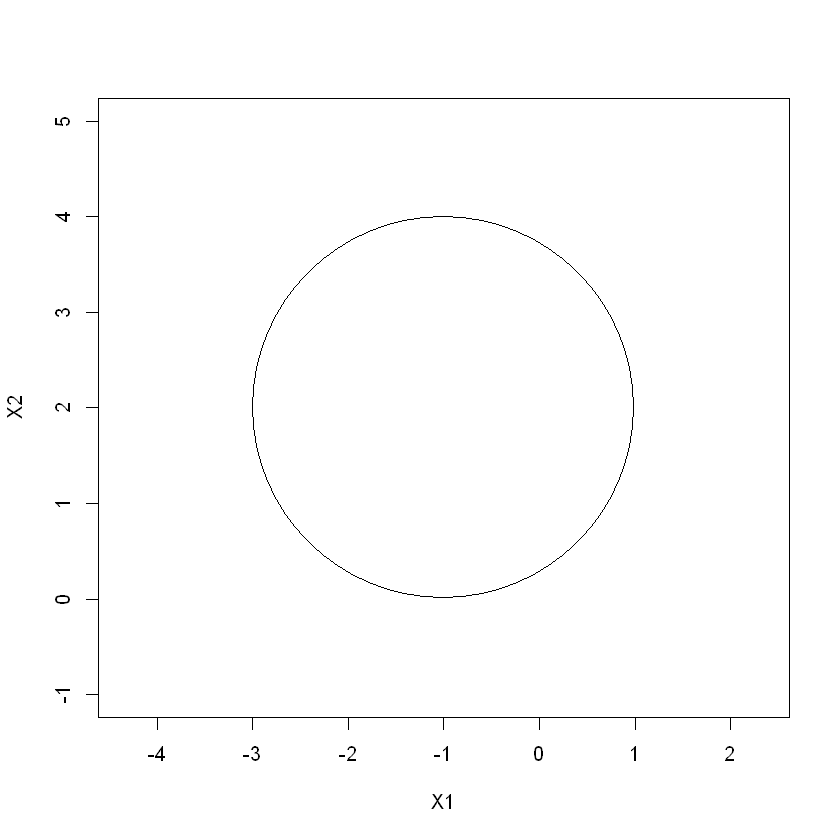

In [10]:
# (part a) sketch the curve

plot(NA, NA, type = "n", xlim = c(-4, 2), ylim = c(-1, 5), asp = 1, xlab = "X1", ylab = "X2")
symbols(c(-1), c(2), circles = c(2), add = TRUE, inches = FALSE)

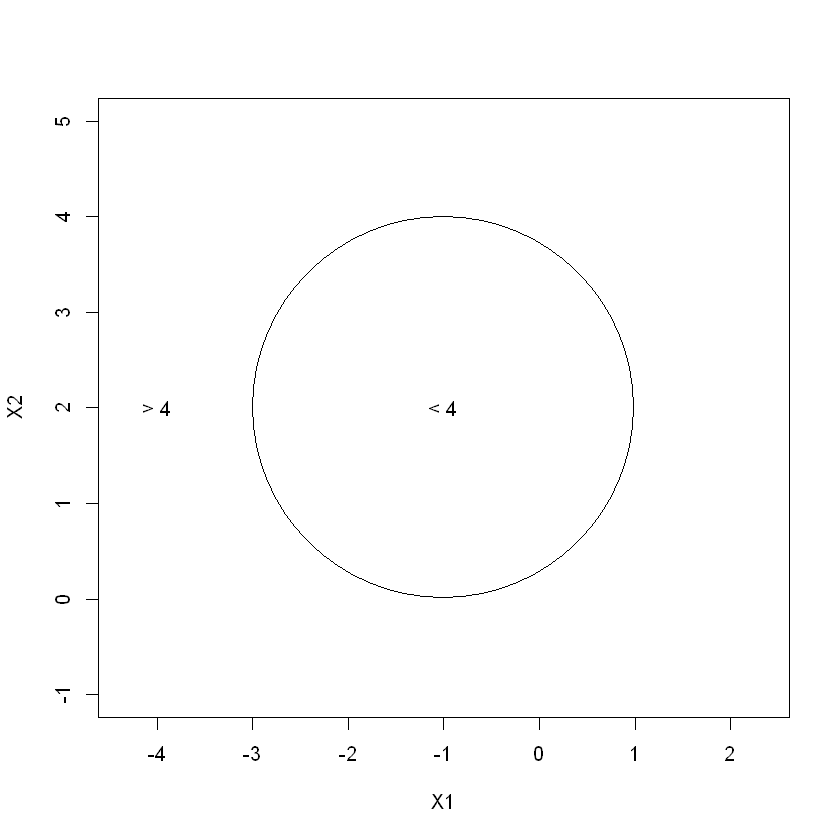

In [11]:
# (part b)on your sketch, indicate the set of points for which
plot(NA, NA, type = "n", xlim = c(-4, 2), ylim = c(-1, 5), asp = 1, xlab = "X1", ylab = "X2")
symbols(c(-1), c(2), circles = c(2), add = TRUE, inches = FALSE)
text(c(-1), c(2), "< 4")
text(c(-4), c(2), "> 4")


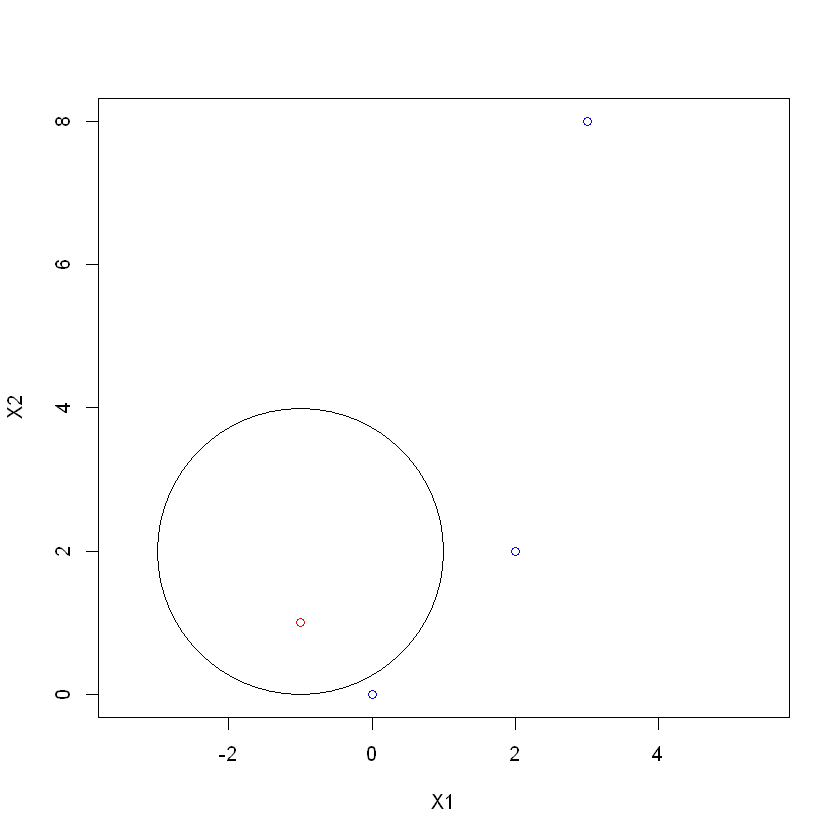

In [12]:
# part (c)
plot(c(0, -1, 2, 3), c(0, 1, 2, 8), col = c("blue", "red", "blue", "blue"), 
    type = "p", asp = 1, xlab = "X1", ylab = "X2")
symbols(c(-1), c(2), circles = c(2), add = TRUE, inches = FALSE)

# Excercise 4 chapter 9

# Excercise 7 chapter 9

In [ ]:
#In this problem, you will use support vector approaches in order to
#predict whether a given car gets high or low gas mileage based on the Auto data set.

In [ ]:
# a) Create a binary variable that takes on a 1 for cars with gas mileage above the median, and a 0 for cars with gas mileage
# below the median.

In [17]:
library(ISLR)
head(Auto)

mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpglevel
18,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu,0
15,8,350,165,3693,11.5,70,1,buick skylark 320,0
18,8,318,150,3436,11.0,70,1,plymouth satellite,0
16,8,304,150,3433,12.0,70,1,amc rebel sst,0
17,8,302,140,3449,10.5,70,1,ford torino,0
15,8,429,198,4341,10.0,70,1,ford galaxie 500,0


In [26]:
#I create the new variable based on the mpg columns
Auto['binary_variable'] <- ifelse(Auto$mpg > median(Auto$mpg), 1, 0)
head(Auto)

mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpglevel,binary_variable
18,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu,0,0
15,8,350,165,3693,11.5,70,1,buick skylark 320,0,0
18,8,318,150,3436,11.0,70,1,plymouth satellite,0,0
16,8,304,150,3433,12.0,70,1,amc rebel sst,0,0
17,8,302,140,3449,10.5,70,1,ford torino,0,0
15,8,429,198,4341,10.0,70,1,ford galaxie 500,0,0


In [27]:
class(Auto$binary_variable)

[1] "numeric"

In [44]:
# (b) Fit a support vector classifier to the data with various values of “cost”, in order to predict whether a car gets high of low gas mileage. Report the cross-validation errors associated with different values of this parameter. Comment on your results.
library(e1071)
set.seed(1)
support_vector <- tune(svm, binary_variable ~ ., data = Auto, kernel = "linear", ranges = list(cost = c(0.01, 0.1, 1, 5, 10, 100, 1000)))
summary(support_vector)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost
    5

- best performance: 0.001121727 

- Detailed performance results:
   cost       error   dispersion
1 1e-02 0.031584409 0.0092580170
2 1e-01 0.001806088 0.0005450778
3 1e+00 0.001189090 0.0003486038
4 5e+00 0.001121727 0.0003514985
5 1e+01 0.001121727 0.0003514985
6 1e+02 0.001121727 0.0003514985
7 1e+03 0.001121727 0.0003514985


In [45]:
# (c) Now repeat (b), this time using SVMs with radial and polynomial basis kernels, with different values of “gamma” and “degree” and “cost”. Comment on your results
set.seed(1)
support_vector2 <- tune(svm, binary_variable ~ ., data = Auto, kernel = "polynomial", ranges = list(cost = c(0.01, 0.1, 1, 5, 10, 100), degree = c(2, 3, 4)))
summary(support_vector2)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost degree
  100      2

- best performance: 0.07533033 

- Detailed performance results:
    cost degree      error dispersion
1  1e-02      2 0.49817497 0.03935058
2  1e-01      2 0.49545439 0.03975738
3  1e+00      2 0.46896577 0.04542045
4  5e+00      2 0.37093227 0.07286044
5  1e+01      2 0.29329971 0.07509888
6  1e+02      2 0.07533033 0.02407119
7  1e-02      3 0.49837532 0.03931289
8  1e-01      3 0.49749480 0.03940602
9  1e+00      3 0.48864485 0.04027626
10 5e+00      3 0.45103643 0.04492777
11 1e+01      3 0.40786251 0.05095285
12 1e+02      3 0.19228502 0.03797601
13 1e-02      4 0.49847154 0.03930298
14 1e-01      4 0.49845619 0.03930640
15 1e+00      4 0.49830272 0.03934080
16 5e+00      4 0.49762166 0.03949842
17 1e+01      4 0.49674987 0.03969942
18 1e+02      4 0.48171740 0.04503885


# Excercise 8 chapter 9

In [48]:
# This problem involves the “OJ” data set which is part of the ISLR package.

# (part a) Create a training set containing a random sample of 800 observations, and a test set containing the remaining observations.
set.seed(1)
train_set <- sample(nrow(OJ), 800)
train <- OJ[train_set, ]
test <- OJ[-train_set, ]

In [50]:
# (part b) Fit a support vector classifier to the training data using “cost” = 0.01, with “Purchase” as the response and the other variables as predictors. Use the summary() function to produce summary statistics, and describe the results obtained.
support_vector_linear <- svm(Purchase ~ ., data =train, kernel = "linear", cost = 0.01)
summary(support_vector_linear)


Call:
svm(formula = Purchase ~ ., data = train, kernel = "linear", cost = 0.01)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  0.01 

Number of Support Vectors:  435

 ( 219 216 )


Number of Classes:  2 

Levels: 
 CH MM




In [51]:
# (part c) What are the training and test error rates?
predict_train <- predict(support_vector_linear, train)
table(train$Purchase, predict_train)

    predict_train
      CH  MM
  CH 420  65
  MM  75 240

In [53]:
error=(420+240)/800
1-error

[1] 0.175

In [54]:
predict_test <- predict(support_vector_linear, test)
table(test$Purchase, predict_test)

    predict_test
      CH  MM
  CH 153  15
  MM  33  69

In [55]:
error2=(153+69)/270
1-error2

[1] 0.1777778

In [56]:
# (part d) Use the tune() function to select an optimal “cost”. Consider values in the range 0.01 to 10.
set.seed(123)
tune_out <- tune(svm, Purchase ~ ., data = OJ.train, kernel = "linear", ranges = list(cost = 10^seq(-2, 1, by = 0.25)))
summary(tune_out)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
       cost
 0.05623413

- best performance: 0.175 

- Detailed performance results:
          cost   error dispersion
1   0.01000000 0.18125 0.04903584
2   0.01778279 0.18375 0.04450733
3   0.03162278 0.17750 0.04669642
4   0.05623413 0.17500 0.04370037
5   0.10000000 0.17875 0.04450733
6   0.17782794 0.17625 0.04427267
7   0.31622777 0.17625 0.04656611
8   0.56234133 0.17750 0.04479893
9   1.00000000 0.17750 0.04479893
10  1.77827941 0.17500 0.04208127
11  3.16227766 0.17625 0.04267529
12  5.62341325 0.17875 0.04450733
13 10.00000000 0.18000 0.04495368


In [62]:
# (part e) Compute the training and test error rates using this new value for “cost”.
svm_linear <- svm(Purchase ~ ., kernel = "linear", data = train, cost = tune_out$best.parameter$cost)
prediction_train2 <- predict(svm_linear, train)
table(train$Purchase, prediction_train2)

    prediction_train2
      CH  MM
  CH 422  63
  MM  70 245

In [60]:
error3=(422+245)/800
1-error3
error

[1] 0.16625

[1] 0.825

In [64]:
prediction_test2 <- predict(svm_linear, test)
table(test$Purchase, prediction_test2)

    prediction_test2
      CH  MM
  CH 154  14
  MM  31  71

In [67]:
error4=(154+71)/270
error4
1-error4

[1] 0.8333333

[1] 0.1666667

In [ ]:
# (part f) Repeat parts (b) through (e) using a support vector machine with a radial kernel. Use the default value for “gamma”.

In [68]:
svm_radial <- svm(Purchase ~ ., kernel = "radial", data =train)
summary(svm_radial)


Call:
svm(formula = Purchase ~ ., data = train, kernel = "radial")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 

Number of Support Vectors:  373

 ( 188 185 )


Number of Classes:  2 

Levels: 
 CH MM




In [69]:
prediction_train3 <- predict(svm_radial, train)
table(train$Purchase, prediction_train3)

    prediction_train3
      CH  MM
  CH 441  44
  MM  77 238

In [71]:
error5=(441+238)/800
error5
1-error5

[1] 0.84875

[1] 0.15125

In [72]:
prediction_test3 <- predict(svm_radial, test)
table(test$Purchase, prediction_test3)

    prediction_test3
      CH  MM
  CH 151  17
  MM  33  69

In [73]:
error6=(151+69)/270
1-error6

[1] 0.1851852